In [1]:
import csv
import numpy as np
import keras as kr
import pandas as pd

Using TensorFlow backend.


In [0]:
!wget -q https://www.dropbox.com/s/ymoligt66xldrxk/IRIS.csv

In [0]:
data = pd.read_csv("IRIS.csv")

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
data['species'].value_counts()


setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")


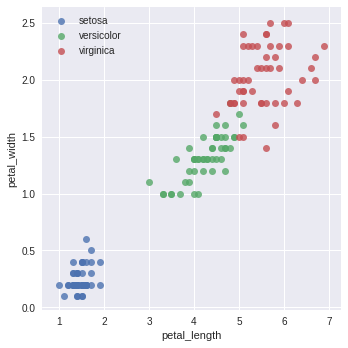

In [7]:
sns.lmplot(x="petal_length", y="petal_width", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

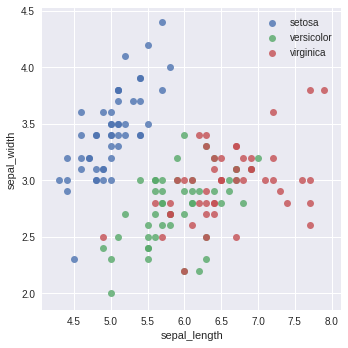

In [8]:
sns.lmplot(x="sepal_length", y="sepal_width", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

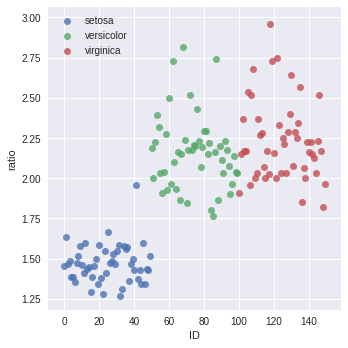

In [9]:
iris["ID"] = iris.index
iris["ratio"] = iris["sepal_length"]/iris["sepal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

In [0]:
# 4 inputs sepal length & width, petal length & width
inputs = np.array(iris)[:,:4].astype(np.float)

# outputs are initially strings , setosa, versicolor, virginica
outputs = np.array(iris)[:,4]

#convert the out strings to ints
outputs_vals, outputs_inds = np.unique(outputs, return_inverse=True)

In [0]:
# endocde the category integers as binary categorial vairables.
outputs_cats = kr.utils.to_categorical(outputs_inds)

# split the input & output data sets into training and test subsets
inds = np.random.permutation(len(inputs))

train_inds, test_inds = np.array_split(inds, 2)

X_train, y_train = inputs[train_inds], outputs_cats[train_inds]
X_test, y_test = inputs[test_inds], outputs_cats[test_inds]

In [12]:
#creats a neral network
model = kr.models.Sequential()

# add an initial layer with 4 inputs nodes, and a hidden layer with 16 nodes
model.add(kr.layers.Dense(16, input_shape=(4,)))

#appy the signoid activation function to that layer
model.add(kr.layers.Activation("sigmoid"))

#add another layer connected to the layet with 16 nodes containing 3 output nodes
model.add(kr.layers.Dense(3))

#use the softmax activation function there
model.add(kr.layers.Activation("softmax"))


Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# configure the model for training
# uses the adam optimizer and categorialcross entropy as the loss function
# add in some extra metrics, accuracy being the only one.
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [13]:


#fit the model using our training data
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
75/75 [==============================] - 0s 3ms/step - loss: 1.4078 - acc: 0.3333
Epoch 2/100
75/75 [==============================] - 0s 1ms/step - loss: 1.1943 - acc: 0.3333
Epoch 3/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0853 - acc: 0.3333
Epoch 4/100
75/75 [==============================] - 0s 1ms/step - loss: 1.0229 - acc: 0.5200
Epoch 5/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9683 - acc: 0.7200
Epoch 6/100
75/75 [==============================] - 0s 1ms/step - loss: 0.9229 - acc: 0.7600
Epoch 7/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8790 - acc: 0.8400
Epoch 8/100
75/75 [==============================] - 0s 1ms/step - loss: 0.8333 - acc: 0.7600
Epoch 9/100
75/75 [==============================] - 0s 1ms/step - loss: 0.7917 - acc: 0.7200
Epoch 10/100
75/75 [==============================] - 0s 981us/step - loss: 0.7516 - acc: 0.9600
Epoch 11/

In [15]:
#evaluate the model using the test data set
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)


print("\n\nloss: %6.4f\nAccuracy: %6.4f"% (loss, accuracy))

75/75 [==============================] - 0s 960us/step


loss: 0.1269
Accuracy: 0.9733


In [16]:
# Predict the class of a single flower.
prediction = np.around(model.predict(np.expand_dims(X_test[0], axis=0))).astype(np.int)[0]
print("Actual: %s\tEstimated: %s" % (y_test[0].astype(np.int), prediction))
print("That means it's a %s" % outputs_vals[prediction.astype(np.bool)][0])

#print("Error {}% Accucary {}%".format((1.0 - accuracy)*100,(accuracy*100)))

# Save the model to a file for later use.
model.save("iris_nn.h5")
# Load the model again with: model = load_model("iris_nn.h5")

Actual: [0 0 1]	Estimated: [0 0 1]
That means it's a virginica


Now with all that done we pick out a piece of data and check to see if we can predict accurately, Which it has, as shown above the Accuracy is roughly 97 - 98% which is a great result.

# End